In [1]:
import torch

In [24]:
def activation(x):
    """
    Sigmoid activation function
    
    ARGS:
    
    x: torch.Tensor
    
    
    """
    return 1/(1+torch.exp(-x))

In [25]:
# setting manual seed to a predicatble things
torch.manual_seed(7)
features=torch.randn((1,5)) #creating tensor of 1 row and 6 columns that contains values randomly disturbuted 
#according to a normal disturbtuion with mean 0 and std of 1
weights=torch.randn_like(features)
bias=torch.randn((1,1))


In [58]:
output=activation((weights.view(5,1)*features).sum()+bias)

In [59]:
print(output)

tensor([[0.1034]])


In [37]:
# multi neural network 
torch.manual_seed(7)
features=torch.randn((1,3))
n_input=features.shape[1]
n_hidden=2
n_output=1

w1=torch.randn(n_input,n_hidden)
w2=torch.randn(n_hidden,n_output)

b1=torch.randn((1,n_hidden))
b2=torch.randn((1,n_output))


In [49]:
hidden=activation(torch.sum(torch.matmul(w1.view(2,3),features.view(3,1)))+b1)

In [50]:
w2.shape

torch.Size([2, 1])

In [51]:
hidden

tensor([[0.8733, 0.8738]])

In [52]:
output=activation(torch.sum(torch.matmul(w2,hidden))+b2)

In [53]:
output

tensor([[0.1050]])

In [60]:
import numpy as np
a=np.arange(0,4)
b=torch.from_numpy(a)
b

tensor([0, 1, 2, 3])

In [61]:
b.mul_(2)

tensor([0, 2, 4, 6])

# building neural networks

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt

In [63]:
# importing mnist data set

In [64]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /home/mohamed/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /home/mohamed/.pytorch/MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /home/mohamed/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /home/mohamed/.pytorch/MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /home/mohamed/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /home/mohamed/.pytorch/MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /home/mohamed/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /home/mohamed/.pytorch/MNIST_data/MNIST/raw



In [65]:


dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)



<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


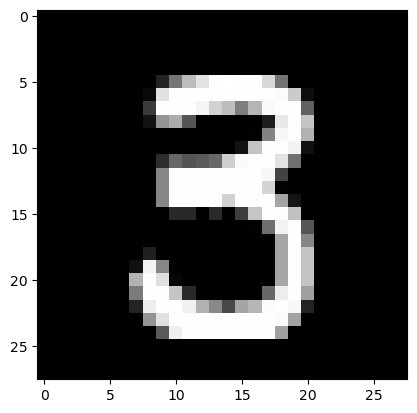

In [66]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [69]:
inputs=images.view(images.shape[0],-1)# choosing -1 for it to choose the most appropiate number
w1=torch.randn(784,256)
b1=torch.randn(256)
w2=torch.randn(256,10)
b2=torch.randn(10)
h=activation(torch.mm(inputs,w1)+b1)
out=torch.mm(h,w2)+b2

In [71]:
print(out.shape)

torch.Size([64, 10])


In [72]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1)

In [73]:
prob=softmax(out)

In [75]:
from torch import nn
class network(nn.Module):
    def __init__(self):
        super().__init__()
        # inputs to a hidden layer linear transformation 
        self.hidden=nn.Linear(784,256)
        self.output=nn.Linear(256,10)
        
        # define sigmoid activation and softmax output
        self.sigmoid=nn.Sigmoid()
        self.softmax=nn.Softmax(dim=1)
        
    def forward(self,x):
        x=self.hidden(x)
        x=self.sigmoid(x)
        x=self.output(x)
        x=self.softmax(x)
        return x
    

In [77]:
# myown neural network
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1=nn.Linear(784,128)
        self.hidden2=nn.Linear(128,64)
        self.output=nn.Linear(64,10)
    def forward(self,x):
        x=self.hidden1(x)
        x= nn.Module.relu(x)
        x=self.hidden2(x)
        x=nn.Module.relu(x)
        x=self.output(x)
        x=nn.Module.softmax(x,dim=1)
        return x

## losses in pytorch

In [78]:
# nn.CrossEntropyLoss
import torch.nn.functional as F

In [79]:
# buidling a model
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))
# Define the loss
criterion = nn.CrossEntropyLoss()
# Get our data
dataiter = iter(trainloader)

images, labels = next(dataiter)

# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)

# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)


tensor(2.3382, grad_fn=<NllLossBackward0>)


In [85]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# Define the loss
criterion = nn.NLLLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our log-probabilities
logps = model(images)
# Calculate the loss with the logps and the labels
loss = criterion(logps, labels)

print(loss)


tensor(2.3248, grad_fn=<NllLossBackward0>)


Now that we know how to calculate a loss, how do we use it to perform backpropagation? Torch provides a module, autograd, for automatically calculating the gradients of tensors. We can use it to calculate the gradients of all our parameters with respect to the loss. Autograd works by keeping track of operations performed on tensors, then going backwards through those operations, calculating gradients along the way. To make sure PyTorch keeps track of operations on a tensor and calculates the gradients, you need to set requires_grad = True on a tensor. You can do this at creation with the requires_grad keyword, or at any time with x.requires_grad_(True).

In [86]:
print('Before backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None


In [89]:
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

After backward pass: 
 tensor([[ 0.0020,  0.0020,  0.0020,  ...,  0.0020,  0.0020,  0.0020],
        [-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        [-0.0015, -0.0015, -0.0015,  ..., -0.0015, -0.0015, -0.0015],
        [ 0.0033,  0.0033,  0.0033,  ...,  0.0033,  0.0033,  0.0033]])


here's one last piece we need to start training, an optimizer that we'll use to update the weights with the gradients. We get these from PyTorch's optim package. For example we can use stochastic gradient descent with optim.SGD. You can see how to define an optimizer below.

In [90]:
from torch import optim
optimizer = optim.SGD(model.parameters(), lr=0.01)
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)


Initial weights -  Parameter containing:
tensor([[ 0.0154,  0.0078,  0.0194,  ..., -0.0062,  0.0331, -0.0176],
        [-0.0309, -0.0265, -0.0343,  ..., -0.0351,  0.0228, -0.0162],
        [-0.0010, -0.0314, -0.0307,  ..., -0.0010, -0.0102, -0.0086],
        ...,
        [ 0.0065, -0.0041,  0.0353,  ...,  0.0312, -0.0262, -0.0034],
        [-0.0091,  0.0059,  0.0079,  ..., -0.0331,  0.0308,  0.0298],
        [ 0.0355, -0.0084,  0.0252,  ...,  0.0325, -0.0165,  0.0257]],
       requires_grad=True)
Gradient - tensor([[ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [ 0.0044,  0.0044,  0.0044,  ...,  0.0044,  0.0044,  0.0044],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.0006, -0.0006, -0.0006,  ..., -0.0006, -0.0006, -0.0006],
        [-0.0064, -0.0064, -0.0064,  ..., -0.0064, -0.0064, -0.0064],
        [-0.0016, -0.0016, -0.0016,  ..., -0.0016, -0.0016, -0.0016]])


In [91]:
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0154,  0.0078,  0.0194,  ..., -0.0062,  0.0331, -0.0176],
        [-0.0310, -0.0265, -0.0343,  ..., -0.0352,  0.0227, -0.0162],
        [-0.0010, -0.0314, -0.0307,  ..., -0.0010, -0.0102, -0.0086],
        ...,
        [ 0.0066, -0.0041,  0.0354,  ...,  0.0312, -0.0262, -0.0033],
        [-0.0091,  0.0059,  0.0079,  ..., -0.0331,  0.0308,  0.0298],
        [ 0.0355, -0.0084,  0.0252,  ...,  0.0325, -0.0165,  0.0257]],
       requires_grad=True)


In [92]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.8450131201540738
Training loss: 0.8034967780430943
Training loss: 0.5252018984891712
Training loss: 0.4336673424346869
Training loss: 0.3882130520430201
